# Prerequisites

In [1]:
import sys

sys.path.append("..")

In [2]:
%load_ext autoreload
%autoreload 2

import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms.v2 as transforms
from skimage.io import imread
from torch.utils.data import DataLoader, Dataset
from torchvision.models import resnet18
from tqdm.notebook import tqdm
from dataset3d import BNSet
import transforms3d as T
from util3d import show_volume

In [3]:
data_dir = "../data/bugNIST_DATA"

name_legend = {
    "ac": "brown_cricket",
    "bc": "black_cricket",
    "bf": "blow_fly",
    "bl": "buffalo_bettle_larva",
    "bp": "blow_fly_pupa",
    "cf": "curly-wing_fly",
    "gh": "grasshopper",
    "ma": "maggot",
    "ml": "mealworm",
    "pp": "green_bottle_fly_pupa",
    "sl": "soldier_fly_larva",
    "wo": "woodlice",
}

# Transforms

In [50]:
transform = transforms.Compose(
    [
        T.ToTensor(),
        T.RandomAxisFlip(0),
        T.RandomAxisFlip(1),
        T.RandomAxisFlip(2),
        T.RollJitter(),
        T.IntensityJitter(0.1, 0.1)
    ]
)

dset = BNSet(data_dir, "train", transform=transform)

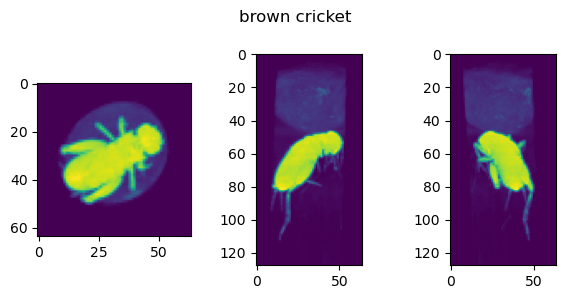

(tensor(0, dtype=torch.uint8),
 tensor(163, dtype=torch.uint8),
 4.225719451904297)

In [64]:
volume, label = dset[0]
show_volume(volume[0].numpy(), label)
volume.min(), volume.max(), volume.numpy().mean()